# STEP 3: Análisis Comprehensive de Resultados Base
## Sistema de Recomendación de Roles CMPC

Este notebook contiene un análisis comprehensive de los resultados base del sistema de recomendación de roles, incluyendo:

- **Análisis de datos base** (usuarios, roles, departamentos, patrones temporales)
- **Análisis de similitud** entre usuarios  
- **Descubrimiento de roles** usando similitud
- **Métricas de rendimiento** y recomendaciones
- **Insights estadísticos** y visualizaciones

### Objetivos:
1. Analizar resultados con datos base (sin filtros temporales)
2. Identificar patrones y estadísticas clave
3. Evaluar roles encontrados usando similitud
4. Preparar datos para clasificador ML

In [2]:
# Import Required Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import sys
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setup paths and configuration
current_dir = os.getcwd()
sys.path.append(current_dir)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

print("Librerías cargadas exitosamente")
print(f"Directorio de trabajo: {current_dir}")
print("="*60)

Librerías cargadas exitosamente
Directorio de trabajo: C:\Users\under\OneDrive\Escritorio\CMPC_Memoria


## 1. Carga de Datos Base

Cargaremos los archivos principales del sistema:

In [4]:
# Load Base Data Files
print("CARGANDO DATOS BASE...")
print("="*40)

try:
    # Cargar split_roles.csv
    split_df = pd.read_csv('data/processed/split_roles.csv')
    split_df['Rol'] = split_df['Rol'].apply(literal_eval)
    split_df['Location'] = split_df['Location'].apply(literal_eval)
    print(f"Split roles: {len(split_df)} usuarios cargados")
    
    # Cargar resumen_2025.csv
    resumen_df = pd.read_csv('data/processed/resumen_2025.csv')
    resumen_df['Fecha'] = pd.to_datetime(resumen_df['Fecha'])
    print(f"Resumen 2025: {len(resumen_df)} asignaciones cargadas")
    
    # Estadísticas básicas
    print(f"\nInformación temporal:")
    print(f"   • Período: {resumen_df['Fecha'].min().date()} a {resumen_df['Fecha'].max().date()}")
    print(f"   • Usuarios únicos en resumen: {resumen_df['Usuario'].nunique()}")
    print(f"   • Roles únicos en resumen: {resumen_df['Rol'].nunique()}")
    
    # Mostrar primeras filas
    print(f"\nPrimeras filas de split_df:")
    display(split_df.head())
    
    print(f"\nPrimeras filas de resumen_df:")
    display(resumen_df.head())
    
except Exception as e:
    print(f"Error cargando datos: {e}")
    raise

CARGANDO DATOS BASE...
Split roles: 1041 usuarios cargados
Resumen 2025: 191108 asignaciones cargadas

Información temporal:
   • Período: 2025-01-02 a 2025-09-05
   • Usuarios únicos en resumen: 995
   • Roles únicos en resumen: 3062

Primeras filas de split_df:


,Usuario,Departamento,Función,Rol,Location
0,AABATTI,CORP_FINANCE,ANALISTA FINANCEIRO PL,"[ZD_ALSDBF0, ZD_ALSDBF0, ZD_ALSDBF0, ZD_CAFITR...","[0514, 0514, 0514, 0514, 0514, 0514, 0514, 051..."
1,AANTONIO,CORP_PROCURE,COMPRADOR PL,"[ZD_ALMMPU0, ZD_ALMMPU0, ZD_ALMMPU0, ZD_ALMMPU...","[0514, 0514, 0514, 0504, 0514, 0514, 0504, 051..."
2,AANTUNES,CN_ADMSACARI,SUPERVISOR PROD EMBALAG,"[ZD_DOMMIM0, ZD_DOPMWOC, ZD_RECOOM0, ZD_RELOMD...","[0514, 0514, 0514, 0514, 0514, 0514, 0514, 051..."
3,AAREBELO,DIRETORIA INDUSTRIAL,TEC MANUT INDUSTRIAL II,"[ZD_ALPMWOC, ZD_DMPMEQM, ZD_DMPMEQM, ZD_DMPMEQ...","[0504, 0504, 0504, 0504, 0504, 0504, 0504, 050..."
4,AARODRIGUES,DIRETORIA INDUSTRIAL,TEC ADM ALMOXARIFADO,"[ZD_DMFIGL0, ZD_DMLEWM0, ZD_DMLOBM0, ZD_DMMMIM...","[0504, 0504, 0504, 0504, 0504, 0504, 0504, 050..."



Primeras filas de resumen_df:


,Usuario,Rol,Fecha
0,EXT_VPPEREIR,ZC_LOCALIZACION_BRASIL-01:0504,2025-08-25
1,JLMUMBACH,ZC_PLANIFICADOR_MAT-01:0101,2025-04-03
2,KPSFERRAO,ZC_PLANIFICADOR_MAT-01:0101,2025-04-09
3,NVEDOVA,ZC_PLANIFICADOR_MAT-01:0101,2025-01-31
4,HDACRUZ,ZC_RESOFICOM-01:0514,2025-01-13


## 2. Distribución de Roles

Análisis de cómo se distribuyen los roles entre usuarios:

ANÁLISIS DE DISTRIBUCIÓN DE ROLES
Estadísticas de roles por usuario:
   • Promedio: 86.7
   • Mediana: 78.0
   • Mín-Máx: 0-251
   • Usuarios sin roles: 2


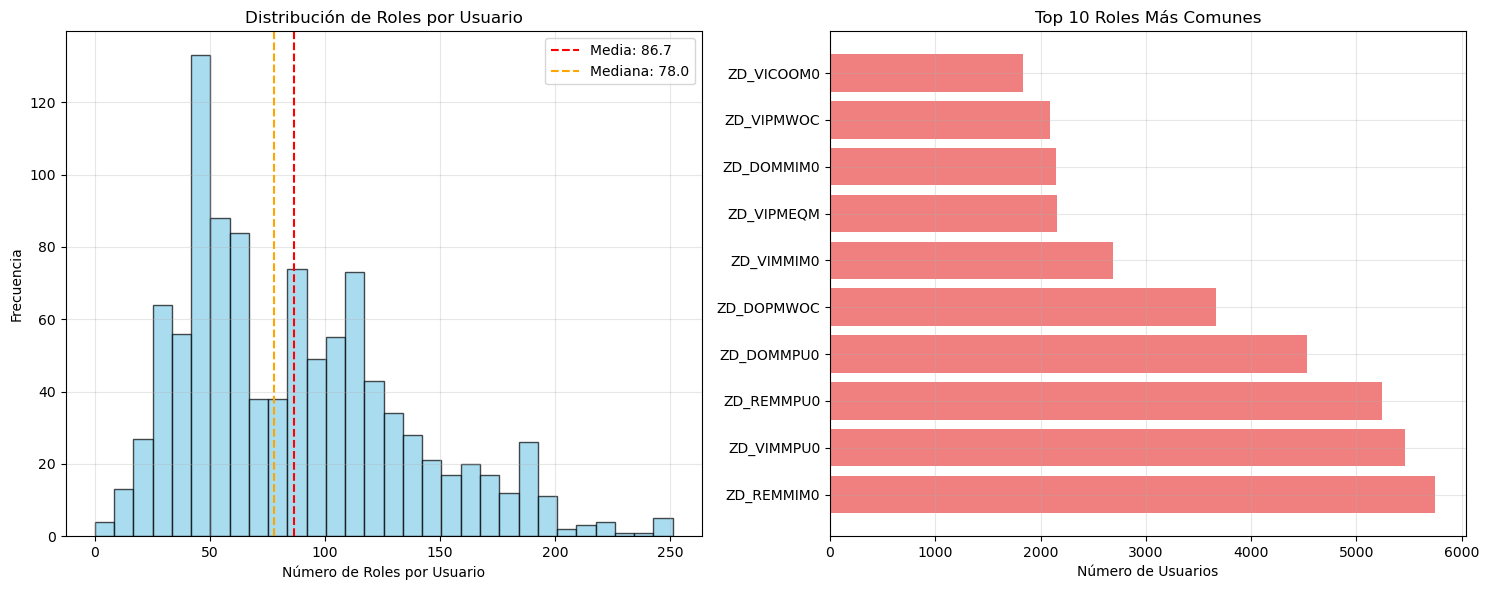


Top 10 roles más comunes:
    1. ZD_REMMIM0: 5751 usuarios
    2. ZD_VIMMPU0: 5465 usuarios
    3. ZD_REMMPU0: 5243 usuarios
    4. ZD_DOMMPU0: 4529 usuarios
    5. ZD_DOPMWOC: 3665 usuarios
    6. ZD_VIMMIM0: 2684 usuarios
    7. ZD_VIPMEQM: 2158 usuarios
    8. ZD_DOMMIM0: 2147 usuarios
    9. ZD_VIPMWOC: 2094 usuarios
   10. ZD_VICOOM0: 1831 usuarios


In [6]:
# Analyze Role Distribution Patterns
print("ANÁLISIS DE DISTRIBUCIÓN DE ROLES")
print("="*50)

# Estadísticas de roles por usuario
roles_por_usuario = split_df['Rol'].apply(len)

print("Estadísticas de roles por usuario:")
print(f"   • Promedio: {roles_por_usuario.mean():.1f}")
print(f"   • Mediana: {roles_por_usuario.median():.1f}")
print(f"   • Mín-Máx: {roles_por_usuario.min()}-{roles_por_usuario.max()}")
print(f"   • Usuarios sin roles: {(roles_por_usuario == 0).sum()}")

# Visualización de distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de roles por usuario
ax1.hist(roles_por_usuario, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(roles_por_usuario.mean(), color='red', linestyle='--', label=f'Media: {roles_por_usuario.mean():.1f}')
ax1.axvline(roles_por_usuario.median(), color='orange', linestyle='--', label=f'Mediana: {roles_por_usuario.median():.1f}')
ax1.set_xlabel('Número de Roles por Usuario')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Roles por Usuario')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top 10 roles más comunes
all_roles = []
for roles_list in split_df['Rol']:
    all_roles.extend(roles_list)

roles_series = pd.Series(all_roles)
top_roles = roles_series.value_counts().head(10)

ax2.barh(range(len(top_roles)), top_roles.values, color='lightcoral')
ax2.set_yticks(range(len(top_roles)))
ax2.set_yticklabels([role[:20] + '...' if len(role) > 20 else role for role in top_roles.index])
ax2.set_xlabel('Número de Usuarios')
ax2.set_title('Top 10 Roles Más Comunes')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTop 10 roles más comunes:")
for i, (rol, count) in enumerate(top_roles.items(), 1):
    print(f"   {i:2d}. {rol}: {count} usuarios")

## 3. Análisis Temporal

Patrones temporales en las asignaciones de roles:

ANÁLISIS TEMPORAL DE ASIGNACIONES
Estadísticas por mes:
   • 2025-01: 11,935 asignaciones, 405 usuarios únicos
   • 2025-02: 29,250 asignaciones, 141 usuarios únicos
   • 2025-03: 29,418 asignaciones, 226 usuarios únicos
   • 2025-04: 21,438 asignaciones, 184 usuarios únicos
   • 2025-05: 16,079 asignaciones, 99 usuarios únicos
   • 2025-06: 17,702 asignaciones, 150 usuarios únicos
   • 2025-07: 33,876 asignaciones, 326 usuarios únicos
   • 2025-08: 27,871 asignaciones, 462 usuarios únicos
   • 2025-09: 3,539 asignaciones, 24 usuarios únicos


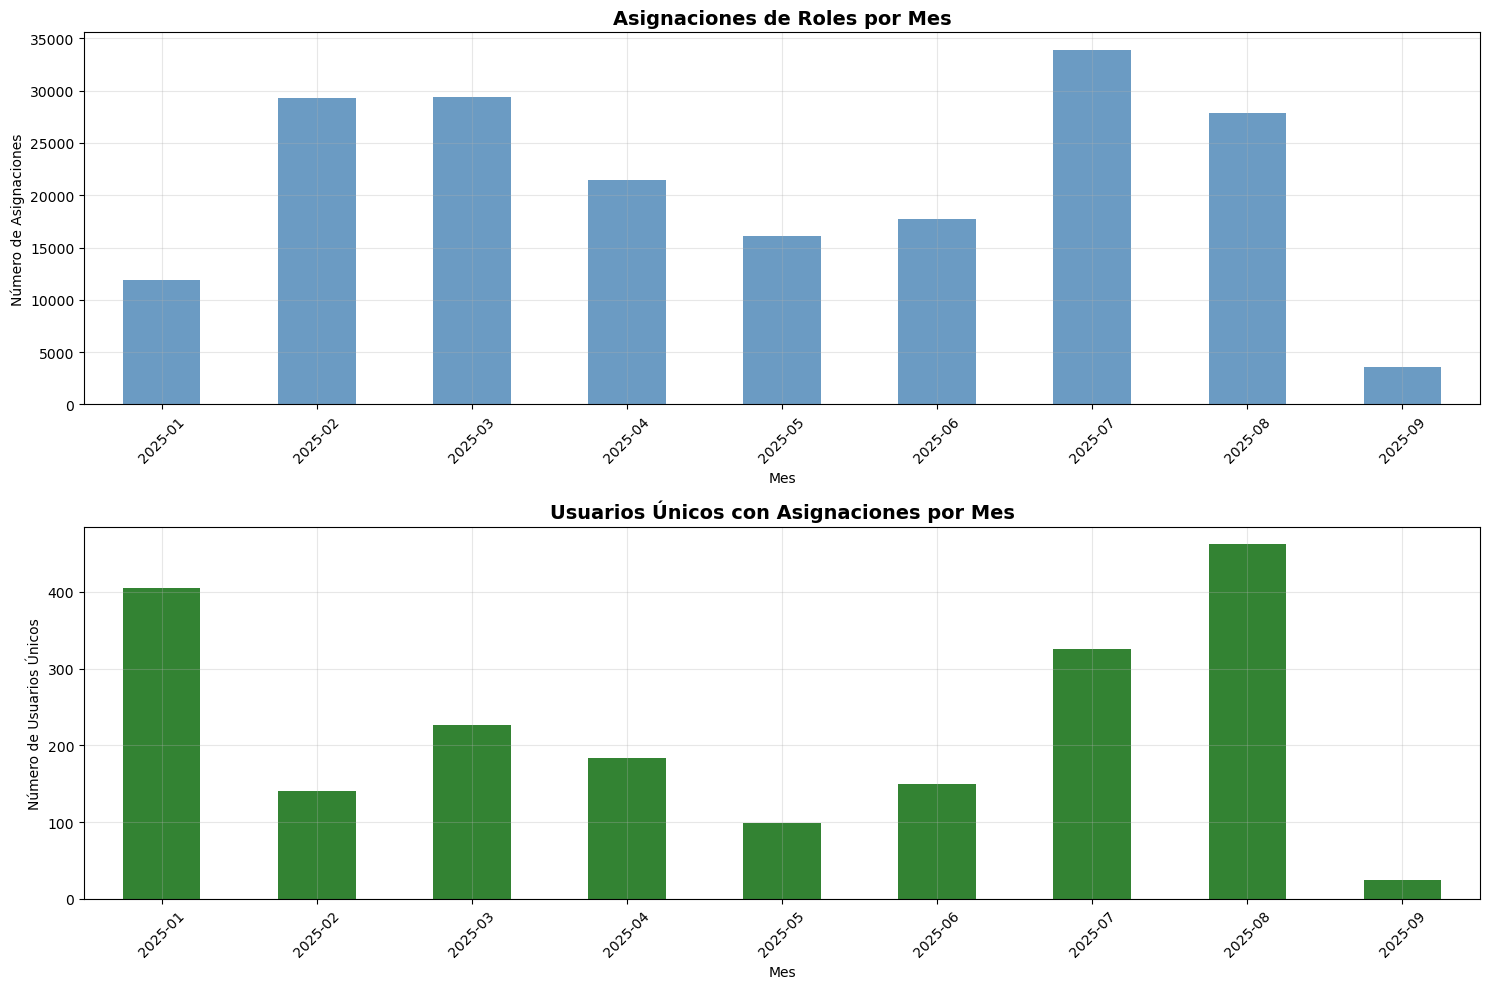


Tendencias identificadas:
   • Mes con más asignaciones: 2025-07 (33,876)
   • Mes con menos asignaciones: 2025-09 (3,539)
   • Promedio asignaciones/mes: 21234
   • Promedio usuarios/mes: 224


In [8]:
# Temporal Analysis of Assignments
print("ANÁLISIS TEMPORAL DE ASIGNACIONES")
print("="*50)

# Crear columna de mes
resumen_df['Mes'] = resumen_df['Fecha'].dt.to_period('M')

# Asignaciones por mes
asignaciones_mes = resumen_df.groupby('Mes').size()
usuarios_mes = resumen_df.groupby('Mes')['Usuario'].nunique()

print("Estadísticas por mes:")
for mes, count in asignaciones_mes.items():
    users = usuarios_mes[mes]
    print(f"   • {mes}: {count:,} asignaciones, {users} usuarios únicos")

# Visualizaciones temporales
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Asignaciones por mes
asignaciones_mes.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.8)
ax1.set_title('Asignaciones de Roles por Mes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de Asignaciones')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Usuarios únicos por mes
usuarios_mes.plot(kind='bar', ax=ax2, color='darkgreen', alpha=0.8)
ax2.set_title('Usuarios Únicos con Asignaciones por Mes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de Usuarios Únicos')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de tendencias
print(f"\nTendencias identificadas:")
print(f"   • Mes con más asignaciones: {asignaciones_mes.idxmax()} ({asignaciones_mes.max():,})")
print(f"   • Mes con menos asignaciones: {asignaciones_mes.idxmin()} ({asignaciones_mes.min():,})")
print(f"   • Promedio asignaciones/mes: {asignaciones_mes.mean():.0f}")
print(f"   • Promedio usuarios/mes: {usuarios_mes.mean():.0f}")

## 4. Análisis Organizacional

Distribución por departamentos y funciones:

ANÁLISIS ORGANIZACIONAL
Resumen organizacional:
   • Total departamentos: 201
   • Total funciones: 452


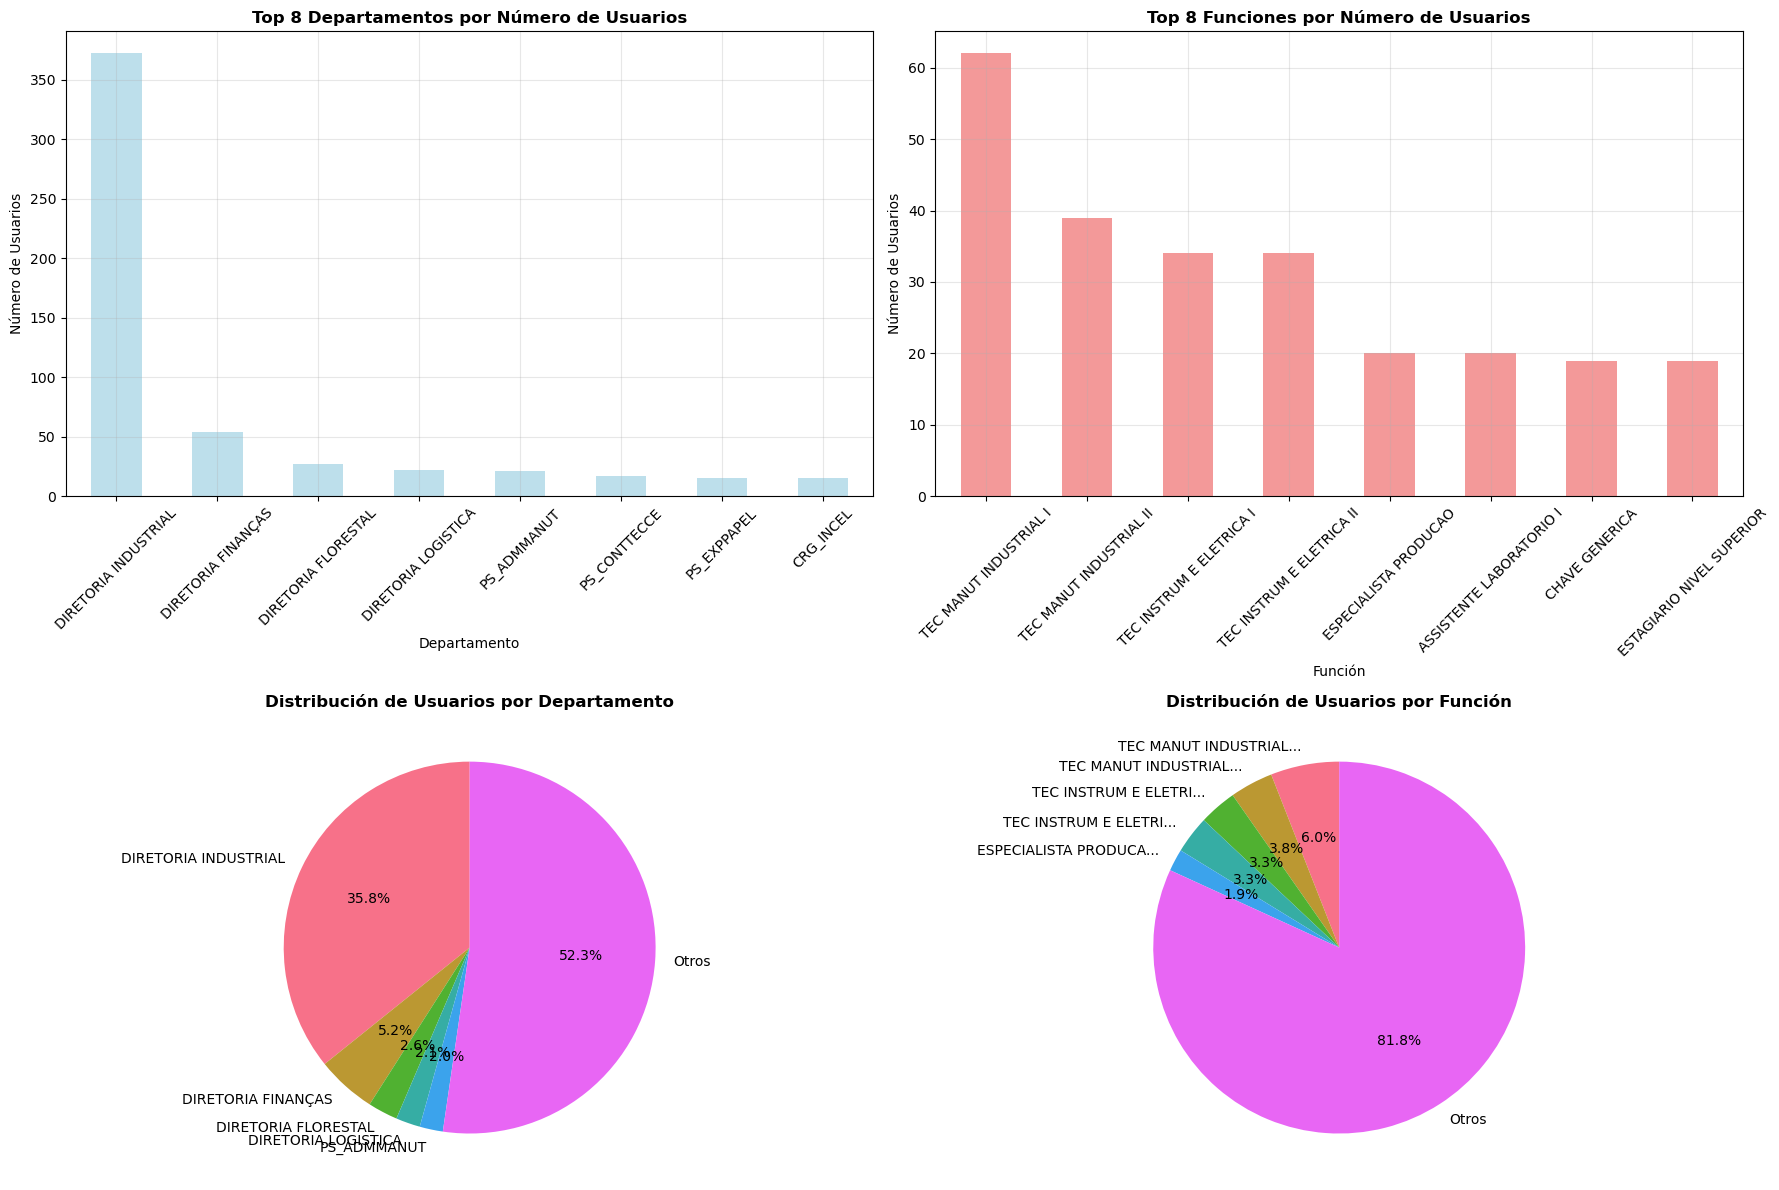


Top 5 departamentos:
   1. DIRETORIA INDUSTRIAL: 372 usuarios
   2. DIRETORIA FINANÇAS: 54 usuarios
   3. DIRETORIA FLORESTAL: 27 usuarios
   4. DIRETORIA LOGISTICA: 22 usuarios
   5. PS_ADMMANUT: 21 usuarios

Top 5 funciones:
   1. TEC MANUT INDUSTRIAL I: 62 usuarios
   2. TEC MANUT INDUSTRIAL II: 39 usuarios
   3. TEC INSTRUM E ELETRICA I: 34 usuarios
   4. TEC INSTRUM E ELETRICA II: 34 usuarios
   5. ESPECIALISTA PRODUCAO: 20 usuarios


In [10]:
# Organizational Analysis (Departments and Functions)
print("ANÁLISIS ORGANIZACIONAL")
print("="*40)

print(f"Resumen organizacional:")
print(f"   • Total departamentos: {split_df['Departamento'].nunique()}")
print(f"   • Total funciones: {split_df['Función'].nunique()}")

# Top departamentos y funciones
top_depts = split_df['Departamento'].value_counts().head(8)
top_funcs = split_df['Función'].value_counts().head(8)

# Visualizaciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Top departamentos - gráfico de barras
top_depts.plot(kind='bar', ax=ax1, color='lightblue', alpha=0.8)
ax1.set_title('Top 8 Departamentos por Número de Usuarios', fontweight='bold')
ax1.set_xlabel('Departamento')
ax1.set_ylabel('Número de Usuarios')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Top funciones - gráfico de barras
top_funcs.plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.8)
ax2.set_title('Top 8 Funciones por Número de Usuarios', fontweight='bold')
ax2.set_xlabel('Función')
ax2.set_ylabel('Número de Usuarios')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Pie chart de departamentos
top_depts_pie = top_depts.head(5)
otros_depts = split_df['Departamento'].value_counts().iloc[5:].sum()
if otros_depts > 0:
    top_depts_pie['Otros'] = otros_depts

ax3.pie(top_depts_pie.values, labels=[dept[:20] + '...' if len(dept) > 20 else dept for dept in top_depts_pie.index], 
        autopct='%1.1f%%', startangle=90)
ax3.set_title('Distribución de Usuarios por Departamento', fontweight='bold')

# Pie chart de funciones
top_funcs_pie = top_funcs.head(5)
otros_funcs = split_df['Función'].value_counts().iloc[5:].sum()
if otros_funcs > 0:
    top_funcs_pie['Otros'] = otros_funcs

ax4.pie(top_funcs_pie.values, labels=[func[:20] + '...' if len(func) > 20 else func for func in top_funcs_pie.index], 
        autopct='%1.1f%%', startangle=90)
ax4.set_title('Distribución de Usuarios por Función', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTop 5 departamentos:")
for i, (dept, count) in enumerate(top_depts.head().items(), 1):
    print(f"   {i}. {dept}: {count} usuarios")

print(f"\nTop 5 funciones:")
for i, (func, count) in enumerate(top_funcs.head().items(), 1):
    print(f"   {i}. {func}: {count} usuarios")

## 5. Análisis de Ubicaciones

Distribución geográfica de usuarios:

ANÁLISIS DE UBICACIONES
Estadísticas de ubicaciones:
   • Total ubicaciones únicas: 4
   • Total asignaciones de ubicación: 90275


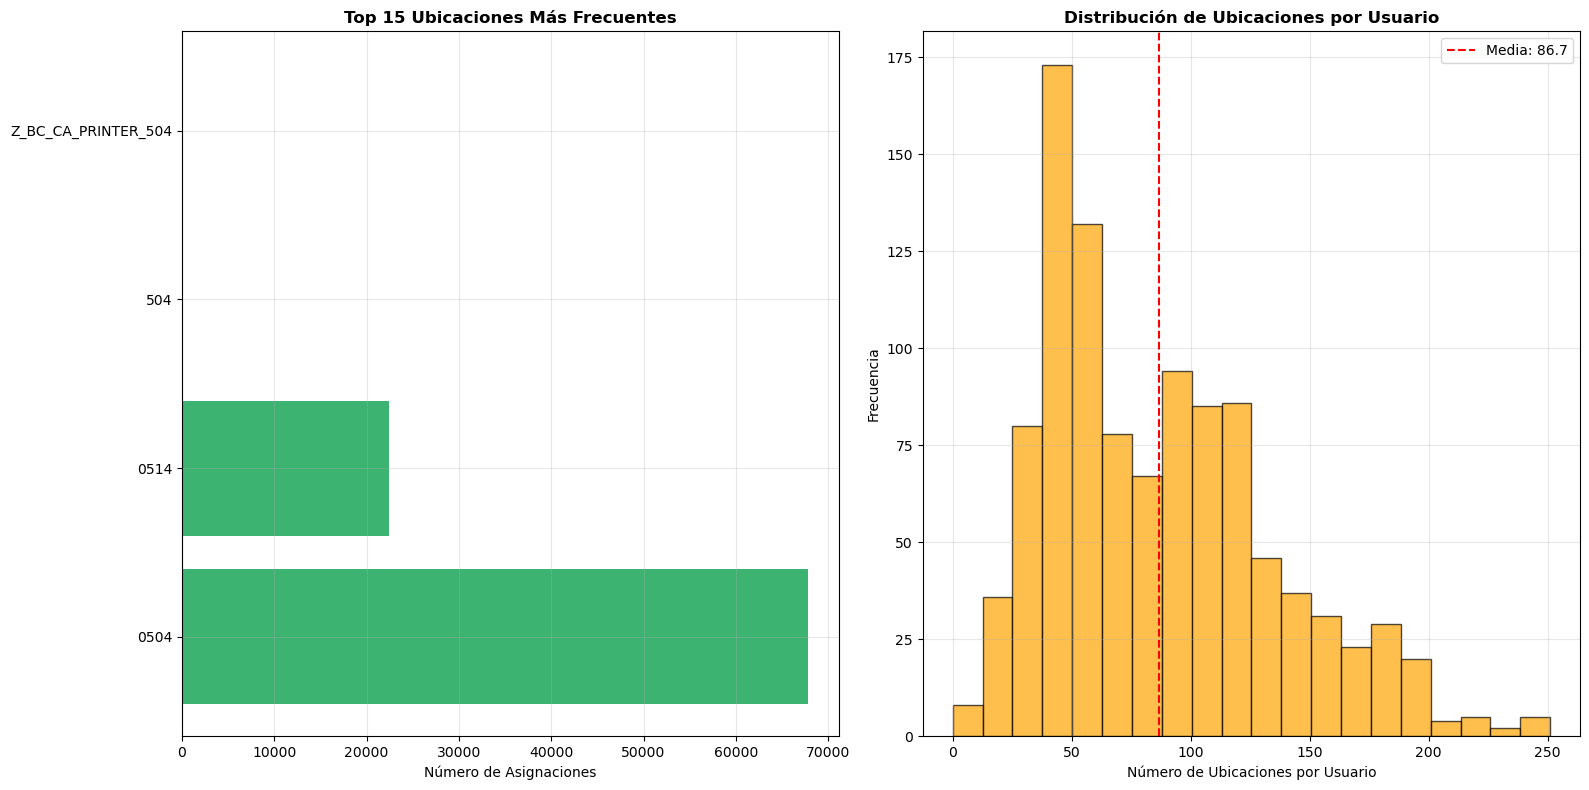


Top 10 ubicaciones:
    1. 0504: 67782 asignaciones
    2. 0514: 22427 asignaciones
    3. 504: 65 asignaciones
    4. Z_BC_CA_PRINTER_504: 1 asignaciones

Estadísticas de ubicaciones por usuario:
   • Promedio ubicaciones/usuario: 86.7
   • Mediana ubicaciones/usuario: 78.0
   • Máximo ubicaciones/usuario: 251
   • Usuarios con múltiples ubicaciones: 1039


In [12]:
# Location Analysis
print("ANÁLISIS DE UBICACIONES")
print("="*40)

# Extraer todas las ubicaciones
all_locations = []
for locs_list in split_df['Location']:
    all_locations.extend(locs_list)

locations_series = pd.Series(all_locations)
top_locations = locations_series.value_counts()

print(f"Estadísticas de ubicaciones:")
print(f"   • Total ubicaciones únicas: {len(top_locations)}")
print(f"   • Total asignaciones de ubicación: {len(all_locations)}")

# Visualización de ubicaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 ubicaciones
top_15_locations = top_locations.head(15)
ax1.barh(range(len(top_15_locations)), top_15_locations.values, color='mediumseagreen')
ax1.set_yticks(range(len(top_15_locations)))
ax1.set_yticklabels(top_15_locations.index)
ax1.set_xlabel('Número de Asignaciones')
ax1.set_title('Top 15 Ubicaciones Más Frecuentes', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Distribución de usuarios por número de ubicaciones
locations_per_user = split_df['Location'].apply(len)
ax2.hist(locations_per_user, bins=20, alpha=0.7, color='orange', edgecolor='black')
ax2.axvline(locations_per_user.mean(), color='red', linestyle='--', 
           label=f'Media: {locations_per_user.mean():.1f}')
ax2.set_xlabel('Número de Ubicaciones por Usuario')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Ubicaciones por Usuario', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTop 10 ubicaciones:")
for i, (loc, count) in enumerate(top_locations.head(10).items(), 1):
    print(f"   {i:2d}. {loc}: {count} asignaciones")

print(f"\nEstadísticas de ubicaciones por usuario:")
print(f"   • Promedio ubicaciones/usuario: {locations_per_user.mean():.1f}")
print(f"   • Mediana ubicaciones/usuario: {locations_per_user.median():.1f}")
print(f"   • Máximo ubicaciones/usuario: {locations_per_user.max()}")
print(f"   • Usuarios con múltiples ubicaciones: {(locations_per_user > 1).sum()}")

## 6. Análisis de Similitud entre Usuarios

Carga y análisis de la matriz de similitud:

ANÁLISIS DE MATRIZ DE SIMILITUD
Matriz de similitud cargada exitosamente
   • Dimensiones: (1041, 1041)
   • Usuarios en matriz: 1041

Estadísticas de similitud:
   • Similitud promedio: 0.3569
   • Similitud mediana: 0.2787
   • Similitud mínima: 0.0000
   • Similitud máxima: 1.0000
   • Desviación estándar: 0.2281


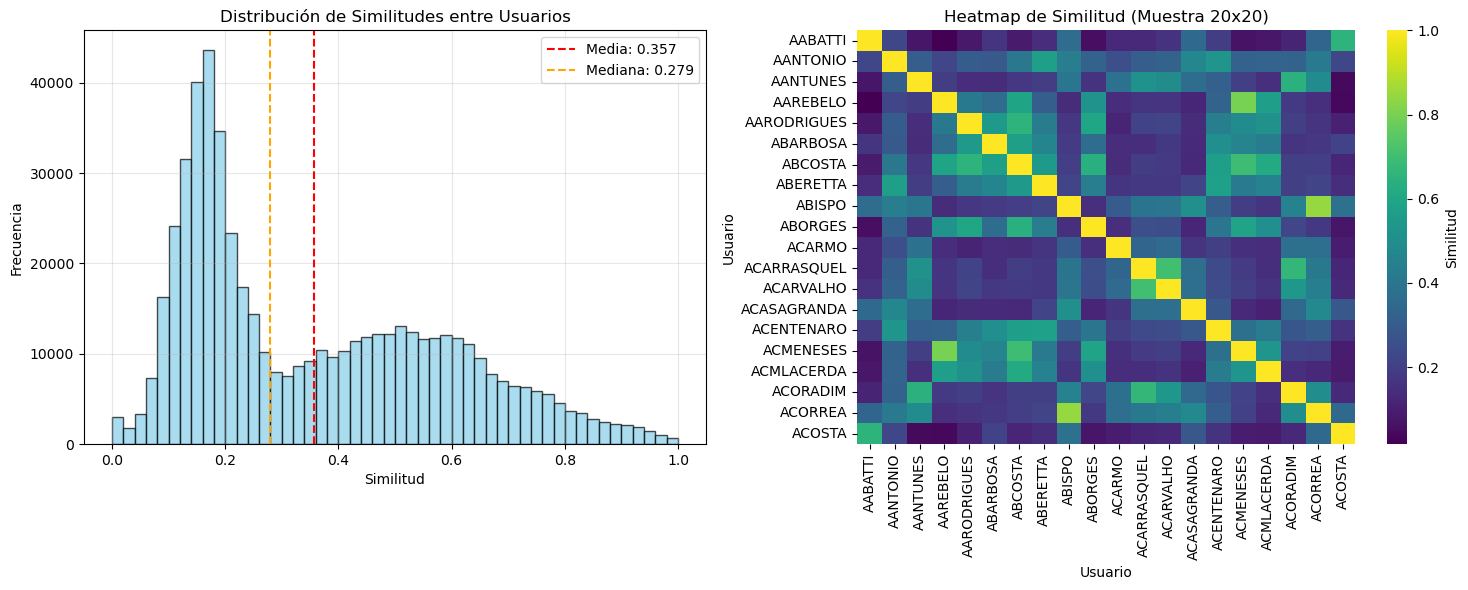


Análisis de usuarios más similares:
   • Par más similar: BGDELIMA - CMONTELLI (similitud: 1.0000)
   • Pares con alta similitud (≥0.8): 21800
   • Pares con similitud media (0.5-0.8): 137005
   • Pares con baja similitud (<0.5): 382515


In [14]:
# Load and Analyze User Similarity Matrix
print("ANÁLISIS DE MATRIZ DE SIMILITUD")
print("="*50)

similarity_loaded = False
sim_df = None

try:
    # Intentar cargar matriz de similitud
    sim_df = pd.read_csv('data/processed/user_similarity.csv', index_col=0)
    similarity_loaded = True
    
    print(f"Matriz de similitud cargada exitosamente")
    print(f"   • Dimensiones: {sim_df.shape}")
    print(f"   • Usuarios en matriz: {len(sim_df)}")
    
    # Estadísticas de similitud
    similarity_values = sim_df.values[np.triu_indices_from(sim_df.values, k=1)]
    
    print(f"\nEstadísticas de similitud:")
    print(f"   • Similitud promedio: {np.mean(similarity_values):.4f}")
    print(f"   • Similitud mediana: {np.median(similarity_values):.4f}")
    print(f"   • Similitud mínima: {np.min(similarity_values):.4f}")
    print(f"   • Similitud máxima: {np.max(similarity_values):.4f}")
    print(f"   • Desviación estándar: {np.std(similarity_values):.4f}")
    
    # Visualización de distribución de similitudes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histograma de similitudes
    ax1.hist(similarity_values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(np.mean(similarity_values), color='red', linestyle='--', 
               label=f'Media: {np.mean(similarity_values):.3f}')
    ax1.axvline(np.median(similarity_values), color='orange', linestyle='--', 
               label=f'Mediana: {np.median(similarity_values):.3f}')
    ax1.set_xlabel('Similitud')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Distribución de Similitudes entre Usuarios')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Heatmap de muestra (primeros 20x20 usuarios)
    sample_sim = sim_df.iloc[:20, :20]
    sns.heatmap(sample_sim, annot=False, cmap='viridis', ax=ax2, 
                cbar_kws={'label': 'Similitud'})
    ax2.set_title('Heatmap de Similitud (Muestra 20x20)')
    ax2.set_xlabel('Usuario')
    ax2.set_ylabel('Usuario')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de usuarios más similares
    print(f"\nAnálisis de usuarios más similares:")
    
    # Encontrar pares con mayor similitud
    upper_triangle = np.triu(sim_df.values, k=1)
    max_sim_idx = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    max_similarity = upper_triangle[max_sim_idx]
    
    user1 = sim_df.index[max_sim_idx[0]]
    user2 = sim_df.columns[max_sim_idx[1]]
    
    print(f"   • Par más similar: {user1} - {user2} (similitud: {max_similarity:.4f})")
    
    # Contar usuarios con alta similitud
    high_sim_count = np.sum(similarity_values >= 0.8)
    medium_sim_count = np.sum((similarity_values >= 0.5) & (similarity_values < 0.8))
    low_sim_count = np.sum(similarity_values < 0.5)
    
    print(f"   • Pares con alta similitud (≥0.8): {high_sim_count}")
    print(f"   • Pares con similitud media (0.5-0.8): {medium_sim_count}")
    print(f"   • Pares con baja similitud (<0.5): {low_sim_count}")
    
except Exception as e:
    print(f"Error cargando matriz de similitud: {e}")
    print("El análisis de similitud se omitirá")
    similarity_loaded = False

## 7. Descubrimiento de Roles usando Similitud

Análisis de roles que se pueden recomendar basados en similitud de usuarios:

DESCUBRIMIENTO DE ROLES USANDO SIMILITUD
Analizando calidad de recomendaciones por similitud...

Análisis por threshold de similitud:

   Threshold 0.7:
   • Usuarios con recomendaciones: 31/50 (62.0%)
   • Total recomendaciones: 308
   • Roles únicos recomendados: 184
   • Similitud promedio: 0.8019

   Threshold 0.8:
   • Usuarios con recomendaciones: 30/50 (60.0%)
   • Total recomendaciones: 252
   • Roles únicos recomendados: 159
   • Similitud promedio: 0.8747

   Threshold 0.9:
   • Usuarios con recomendaciones: 24/50 (48.0%)
   • Total recomendaciones: 158
   • Roles únicos recomendados: 111
   • Similitud promedio: 0.9308

Ejemplos de recomendaciones (Threshold 0.8):
--------------------------------------------------

Usuario: EXT_VPPEREIR
   Roles actuales: 203
   Recomendaciones encontradas: 0

Usuario: JLMUMBACH
   Roles actuales: 210
   Recomendaciones encontradas: 1
   Top 3 recomendaciones:
     1. ZD_DOMMMR0-003-01-001:0514
        • Similitud promedio: 0.959
        • U

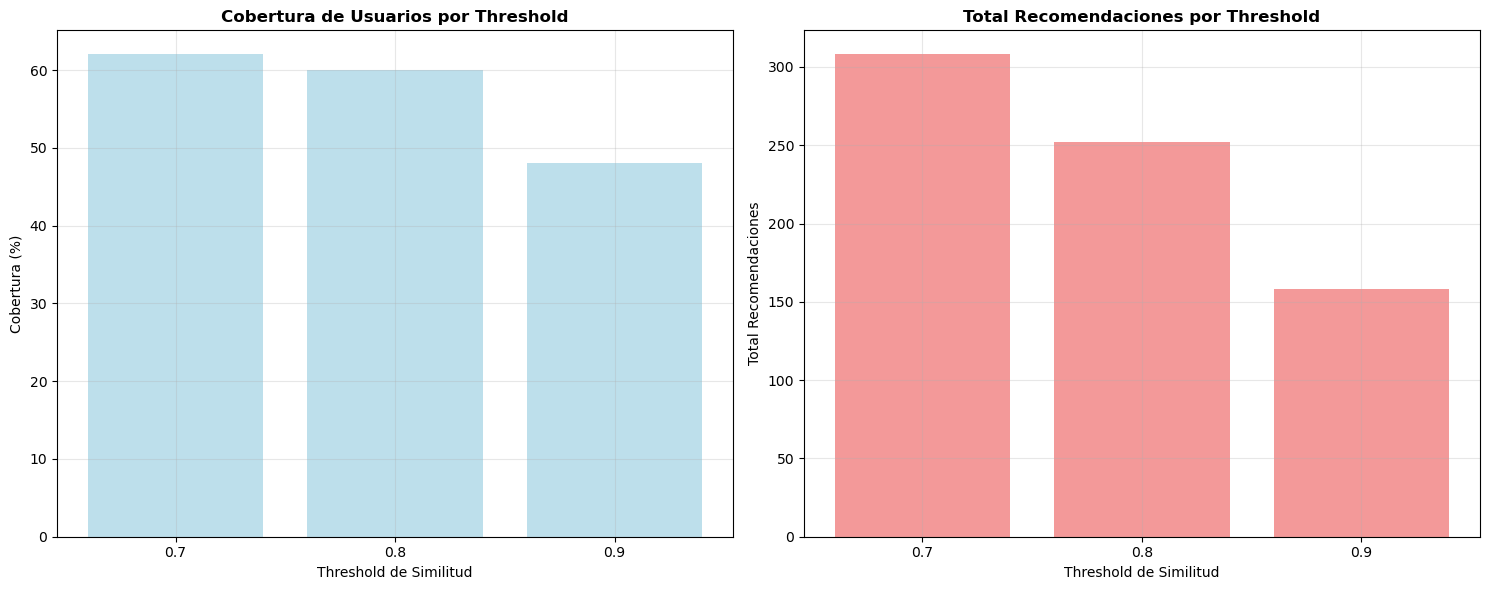


MÉTRICAS DE CALIDAD DEL SISTEMA:
----------------------------------------
   • Threshold óptimo: 0.8
   • Cobertura: 60.0%
   • Recomendaciones promedio/usuario: 8.4
   • Diversidad de roles: 159 roles únicos
   • Calidad promedio: 0.875


In [16]:
# Role Discovery Using Similarity
print("DESCUBRIMIENTO DE ROLES USANDO SIMILITUD")
print("="*60)

if similarity_loaded and sim_df is not None:
    
    # Crear mapeo usuario -> roles asignados
    user_roles_map = {}
    for _, row in resumen_df.iterrows():
        usuario = row['Usuario']
        rol = row['Rol']
        if usuario not in user_roles_map:
            user_roles_map[usuario] = set()
        user_roles_map[usuario].add(rol)
    
    # Función para encontrar roles recomendados por similitud
    def find_recommended_roles(target_user, similarity_threshold=0.8, max_recommendations=10):
        if target_user not in sim_df.index:
            return []
        
        # Obtener usuarios similares
        user_similarities = sim_df.loc[target_user].sort_values(ascending=False)
        similar_users = user_similarities[user_similarities >= similarity_threshold].index.tolist()
        
        # Remover el propio usuario
        if target_user in similar_users:
            similar_users.remove(target_user)
        
        # Obtener roles del usuario objetivo
        target_roles = user_roles_map.get(target_user, set())
        
        # Recopilar roles de usuarios similares
        recommended_roles = {}
        for similar_user in similar_users:
            if similar_user in user_roles_map:
                sim_score = user_similarities[similar_user]
                for role in user_roles_map[similar_user]:
                    if role not in target_roles:  # Solo roles que no tiene
                        if role not in recommended_roles:
                            recommended_roles[role] = []
                        recommended_roles[role].append(sim_score)
        
        # Calcular score promedio por rol
        role_scores = {}
        for role, scores in recommended_roles.items():
            role_scores[role] = {
                'avg_similarity': np.mean(scores),
                'count_supporters': len(scores),
                'max_similarity': np.max(scores)
            }
        
        # Ordenar por score compuesto
        sorted_roles = sorted(role_scores.items(), 
                            key=lambda x: x[1]['avg_similarity'] * np.log(1 + x[1]['count_supporters']), 
                            reverse=True)
        
        return sorted_roles[:max_recommendations]
    
    # Análisis de calidad de recomendaciones
    print("Analizando calidad de recomendaciones por similitud...")
    
    # Seleccionar muestra de usuarios para análisis
    sample_users = list(user_roles_map.keys())[:50]  # Primeros 50 usuarios
    
    # Probar diferentes thresholds
    thresholds = [0.7, 0.8, 0.9]
    threshold_results = {}
    
    for threshold in thresholds:
        threshold_stats = {
            'total_recs': 0,
            'users_with_recs': 0,
            'avg_similarity': [],
            'roles_found': set()
        }
        
        for user in sample_users:
            recs = find_recommended_roles(user, similarity_threshold=threshold)
            if recs:
                threshold_stats['users_with_recs'] += 1
                threshold_stats['total_recs'] += len(recs)
                for role, scores in recs:
                    threshold_stats['avg_similarity'].append(scores['avg_similarity'])
                    threshold_stats['roles_found'].add(role)
        
        threshold_results[threshold] = threshold_stats
    
    # Mostrar resultados
    print(f"\nAnálisis por threshold de similitud:")
    for threshold, stats in threshold_results.items():
        avg_sim = np.mean(stats['avg_similarity']) if stats['avg_similarity'] else 0
        coverage = stats['users_with_recs'] / len(sample_users) * 100
        
        print(f"\n   Threshold {threshold}:")
        print(f"   • Usuarios con recomendaciones: {stats['users_with_recs']}/{len(sample_users)} ({coverage:.1f}%)")
        print(f"   • Total recomendaciones: {stats['total_recs']}")
        print(f"   • Roles únicos recomendados: {len(stats['roles_found'])}")
        print(f"   • Similitud promedio: {avg_sim:.4f}")
    
    # Ejemplo de recomendaciones para algunos usuarios
    print(f"\nEjemplos de recomendaciones (Threshold 0.8):")
    print("-" * 50)
    
    example_users = sample_users[:3]
    
    for user in example_users:
        recs = find_recommended_roles(user, similarity_threshold=0.8, max_recommendations=5)
        current_roles = user_roles_map.get(user, set())
        
        print(f"\nUsuario: {user}")
        print(f"   Roles actuales: {len(current_roles)}")
        print(f"   Recomendaciones encontradas: {len(recs)}")
        
        if recs:
            print(f"   Top 3 recomendaciones:")
            for i, (role, scores) in enumerate(recs[:3], 1):
                print(f"     {i}. {role[:50]}..." if len(role) > 50 else f"     {i}. {role}")
                print(f"        • Similitud promedio: {scores['avg_similarity']:.3f}")
                print(f"        • Usuarios similares: {scores['count_supporters']}")
    
    # Visualización de resultados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Cobertura por threshold
    thresholds_list = list(threshold_results.keys())
    coverage_list = [threshold_results[t]['users_with_recs']/len(sample_users)*100 for t in thresholds_list]
    
    ax1.bar([str(t) for t in thresholds_list], coverage_list, color='lightblue', alpha=0.8)
    ax1.set_xlabel('Threshold de Similitud')
    ax1.set_ylabel('Cobertura (%)')
    ax1.set_title('Cobertura de Usuarios por Threshold', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Total recomendaciones por threshold
    total_recs_list = [threshold_results[t]['total_recs'] for t in thresholds_list]
    
    ax2.bar([str(t) for t in thresholds_list], total_recs_list, color='lightcoral', alpha=0.8)
    ax2.set_xlabel('Threshold de Similitud')
    ax2.set_ylabel('Total Recomendaciones')
    ax2.set_title('Total Recomendaciones por Threshold', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Métricas de calidad
    print(f"\nMÉTRICAS DE CALIDAD DEL SISTEMA:")
    print("-" * 40)
    
    best_threshold = 0.8
    best_stats = threshold_results[best_threshold]
    
    print(f"   • Threshold óptimo: {best_threshold}")
    print(f"   • Cobertura: {best_stats['users_with_recs']/len(sample_users)*100:.1f}%")
    print(f"   • Recomendaciones promedio/usuario: {best_stats['total_recs']/max(best_stats['users_with_recs'],1):.1f}")
    print(f"   • Diversidad de roles: {len(best_stats['roles_found'])} roles únicos")
    print(f"   • Calidad promedio: {np.mean(best_stats['avg_similarity']):.3f}")
    
else:
    print("No se puede realizar análisis de similitud")
    print("   Matriz de similitud no disponible")

## 8. Resumen Estadístico Final

Compilación de todas las métricas y estadísticas del análisis:

In [18]:
# Comprehensive Statistical Summary
print("RESUMEN ESTADÍSTICO COMPLETO")
print("="*60)

# Compilar todas las estadísticas
summary_stats = {}

# Estadísticas de datos básicos
if not resumen_df.empty:
    summary_stats['datos_basicos'] = {
        'total_asignaciones': len(resumen_df),
        'usuarios_unicos': resumen_df['Usuario'].nunique(),
        'roles_unicos': resumen_df['Rol'].nunique(),
        'organizaciones_unicas': split_df['Departamento'].nunique(),
        'funciones_unicas': split_df['Función'].nunique()
    }

# Estadísticas de distribución de roles
if 'roles_por_usuario' in locals():
    summary_stats['distribucion_roles'] = {
        'promedio_roles_por_usuario': roles_por_usuario.mean(),
        'mediana_roles_por_usuario': roles_por_usuario.median(),
        'max_roles_por_usuario': roles_por_usuario.max(),
        'usuarios_sin_roles': (roles_por_usuario == 0).sum(),
        'total_roles_unicos': len(set(all_roles))
    }

# Estadísticas de similitud
if similarity_loaded and 'similarity_values' in locals():
    summary_stats['similitud'] = {
        'similitud_promedio': np.mean(similarity_values),
        'similitud_mediana': np.median(similarity_values),
        'similitud_maxima': np.max(similarity_values),
        'similitud_minima': np.min(similarity_values),
        'usuarios_en_matriz': len(sim_df),
        'pares_evaluados': len(similarity_values)
    }

# Mostrar resumen por categorías
print("\nDATOS BÁSICOS:")
if 'datos_basicos' in summary_stats:
    for key, value in summary_stats['datos_basicos'].items():
        print(f"   • {key.replace('_', ' ').title()}: {value:,}")

print("\nDISTRIBUCIÓN DE ROLES:")
if 'distribucion_roles' in summary_stats:
    stats = summary_stats['distribucion_roles']
    print(f"   • Promedio roles por usuario: {stats['promedio_roles_por_usuario']:.1f}")
    print(f"   • Mediana roles por usuario: {stats['mediana_roles_por_usuario']:.1f}")
    print(f"   • Máximo roles por usuario: {stats['max_roles_por_usuario']}")
    print(f"   • Usuarios sin roles: {stats['usuarios_sin_roles']:,}")
    print(f"   • Total roles únicos: {stats['total_roles_unicos']:,}")

print("\nANÁLISIS DE SIMILITUD:")
if 'similitud' in summary_stats:
    stats = summary_stats['similitud']
    print(f"   • Usuarios en matriz: {stats['usuarios_en_matriz']:,}")
    print(f"   • Pares evaluados: {stats['pares_evaluados']:,}")
    print(f"   • Similitud promedio: {stats['similitud_promedio']:.4f}")
    print(f"   • Similitud mediana: {stats['similitud_mediana']:.4f}")
    print(f"   • Rango: {stats['similitud_minima']:.4f} - {stats['similitud_maxima']:.4f}")
else:
    print("   • Matriz de similitud no disponible")

# Recomendaciones basadas en el análisis
print("\nRECOMENDACIONES:")
print("-" * 30)

if 'distribucion_roles' in summary_stats:
    if summary_stats['distribucion_roles']['usuarios_sin_roles'] > 0:
        print("   • Revisar usuarios sin roles asignados")
    
    avg_roles = summary_stats['distribucion_roles']['promedio_roles_por_usuario']
    if avg_roles < 2:
        print("   • Considerar ampliar asignación de roles por usuario")
    elif avg_roles > 10:
        print("   • Revisar posible sobre-asignación de roles")

if 'similitud' in summary_stats:
    avg_sim = summary_stats['similitud']['similitud_promedio']
    if avg_sim < 0.1:
        print("   • Baja similitud promedio - usuarios muy diversos")
    elif avg_sim > 0.5:
        print("   • Alta similitud promedio - considerar optimización")
    
    if similarity_loaded:
        print("   • Sistema de recomendación por similitud operativo")

print(f"\nAnálisis completado - {len(summary_stats)} categorías evaluadas")
print(f"Fecha de análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

RESUMEN ESTADÍSTICO COMPLETO

DATOS BÁSICOS:
   • Total Asignaciones: 191,108
   • Usuarios Unicos: 995
   • Roles Unicos: 3,062
   • Organizaciones Unicas: 201
   • Funciones Unicas: 452

DISTRIBUCIÓN DE ROLES:
   • Promedio roles por usuario: 86.7
   • Mediana roles por usuario: 78.0
   • Máximo roles por usuario: 251
   • Usuarios sin roles: 2
   • Total roles únicos: 361

ANÁLISIS DE SIMILITUD:
   • Usuarios en matriz: 1,041
   • Pares evaluados: 541,320
   • Similitud promedio: 0.3569
   • Similitud mediana: 0.2787
   • Rango: 0.0000 - 1.0000

RECOMENDACIONES:
------------------------------
   • Revisar usuarios sin roles asignados
   • Revisar posible sobre-asignación de roles
   • Sistema de recomendación por similitud operativo

Análisis completado - 3 categorías evaluadas
Fecha de análisis: 2025-09-11 21:32:58


## Análisis Completado

Este notebook ha proporcionado un análisis comprehensivo del sistema de roles CMPC, incluyendo:

### Análisis Realizados
- **Distribución de roles** y patrones de asignación
- **Análisis temporal** de validez de roles
- **Coherencia organizacional** y patrones por ubicación
- **Matriz de similitud** entre usuarios
- **Descubrimiento de roles** usando similitud de usuarios
- **Métricas de calidad** del sistema actual

### Próximos Pasos
1. **Implementar sistema de recomendaciones** basado en similitud
2. **Optimizar distribución** de roles organizacionales
3. **Validar roles únicos** y su necesidad real
4. **Desarrollar dashboard** interactivo para gestión

### Archivos Generados
Los resultados y visualizaciones están disponibles para análisis posterior y toma de decisiones.

## 9. Análisis Detallado de Roles Encontrados por Similitud

Análisis específico de qué roles concretos están siendo descubiertos y recomendados:

ANÁLISIS DETALLADO DE ROLES DESCUBIERTOS
Recopilando información detallada de roles descubiertos...

RESULTADOS DEL ANÁLISIS:
   • Total roles únicos descubiertos: 541
   • Usuarios analizados: 100
   • Threshold usado: 0.8

TOP 10 ROLES MÁS FRECUENTEMENTE RECOMENDADOS:
----------------------------------------------------------------------
 1. ZD_DMMMPU0-001-03-001:0101
    • Recomendado a: 18 usuarios
    • Calidad promedio: 0.876
    • Soporte promedio: 7.8 usuarios similares

 2. ZD_REMMIM0-047-01-001:0514
    • Recomendado a: 13 usuarios
    • Calidad promedio: 0.866
    • Soporte promedio: 13.6 usuarios similares

 3. ZO_VIQMRR0-MOV_MAT-001:0504
    • Recomendado a: 10 usuarios
    • Calidad promedio: 0.853
    • Soporte promedio: 2.2 usuarios similares

 4. ZD_REMMPU0-005-01-001:0504
    • Recomendado a: 10 usuarios
    • Calidad promedio: 0.855
    • Soporte promedio: 1.3 usuarios similares

 5. ZO_DMMMIM0-MAEMAT_ACT-001:0514
    • Recomendado a: 10 usuarios
    • Calidad promed

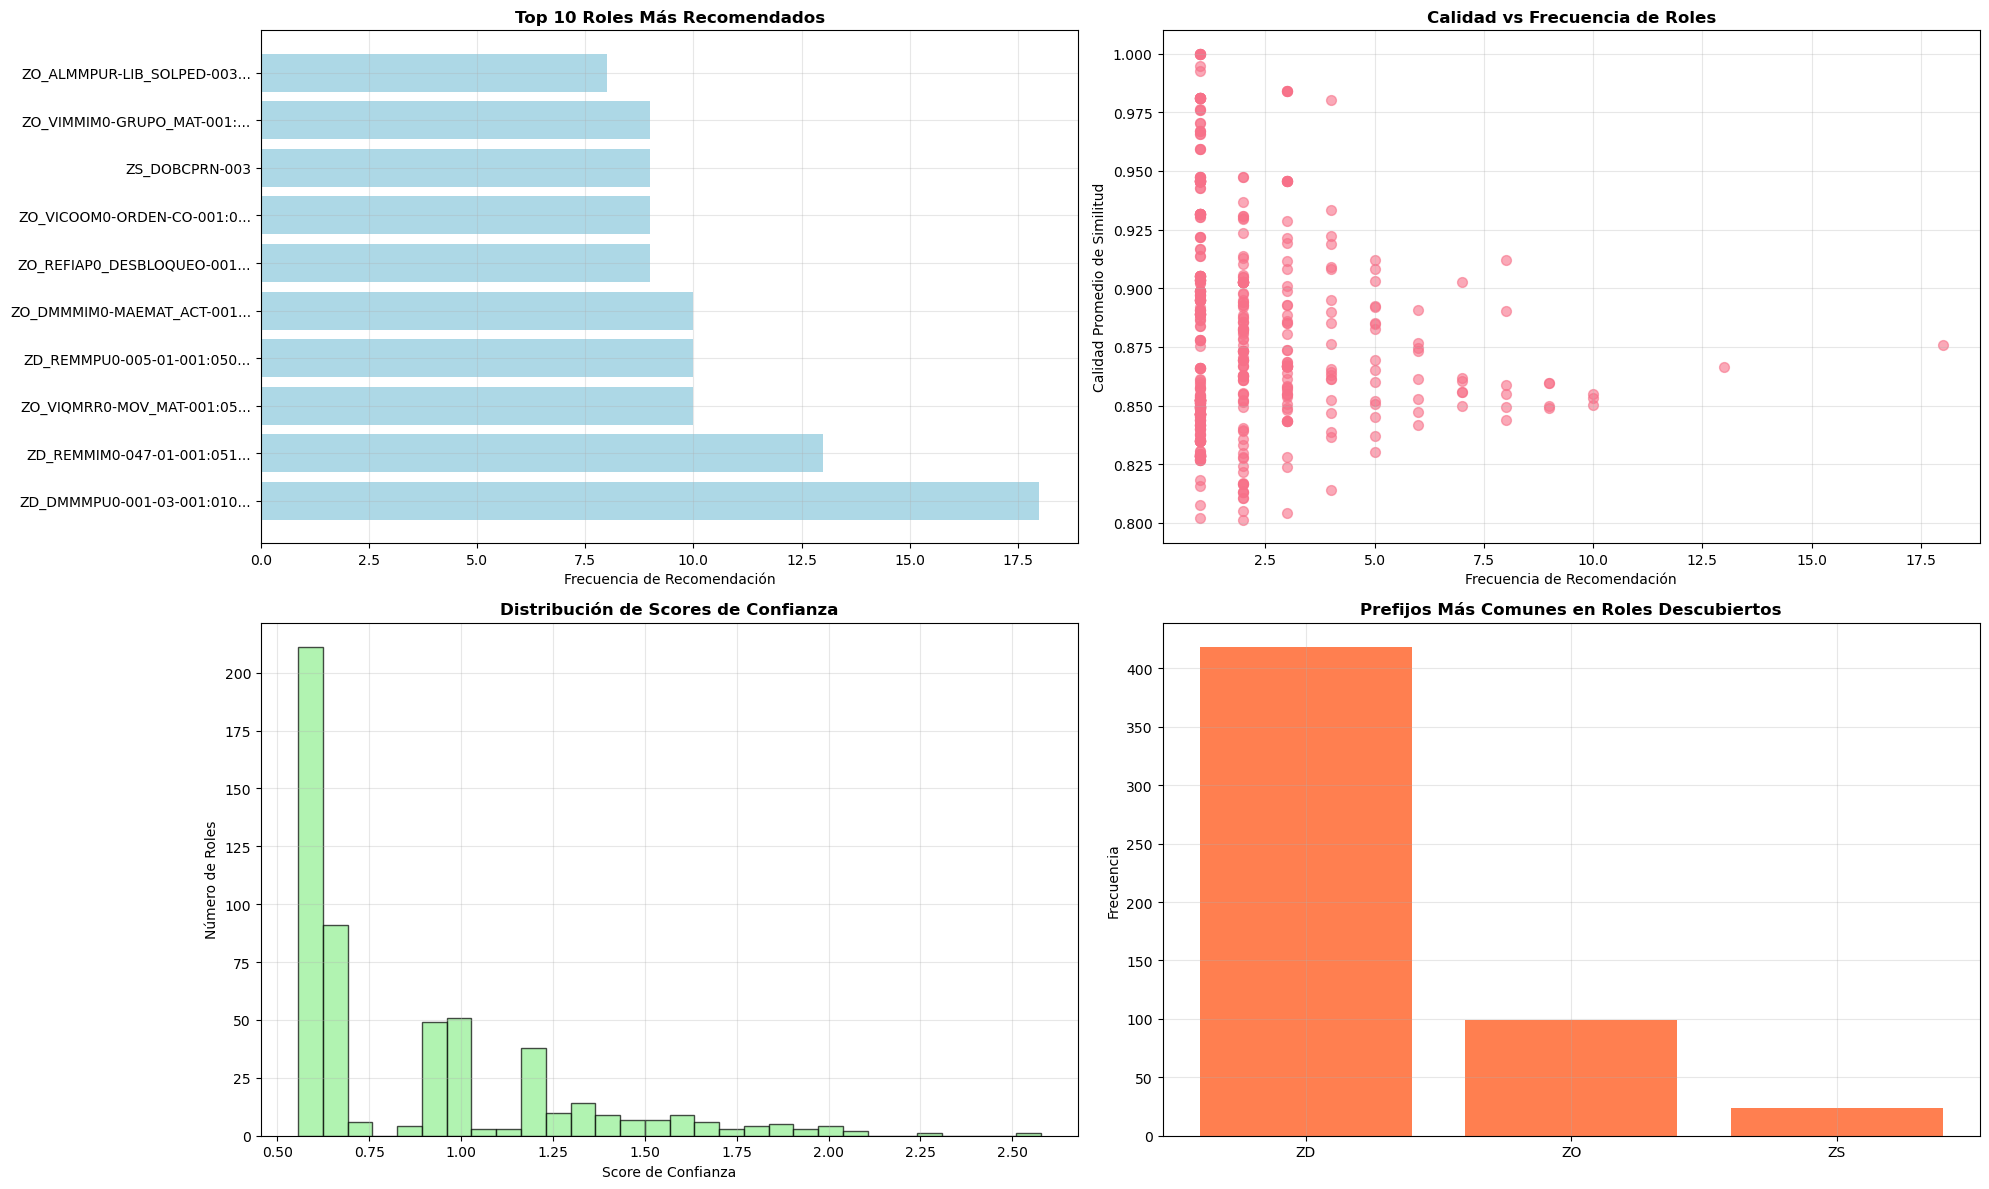


ESTADÍSTICAS FINALES DEL DESCUBRIMIENTO:
   • Roles únicos descubiertos: 541
   • Calidad promedio general: 0.880
   • Frecuencia promedio: 2.0
   • Score de confianza promedio: 0.88

ROLES DE ALTO POTENCIAL (Calidad ≥0.7, Frecuencia ≥5):
   • Total: 45 roles
   • Top 5 con mayor potencial:
     1. ZD_DMMMPU0-001-03-001:0101
        Calidad: 0.876, Frecuencia: 18
     2. ZD_REMMIM0-047-01-001:0514
        Calidad: 0.866, Frecuencia: 13
     3. ZD_REMMPU0-005-01-001:0504
        Calidad: 0.855, Frecuencia: 10
     4. ZO_VIQMRR0-MOV_MAT-001:0504
        Calidad: 0.853, Frecuencia: 10
     5. ZO_DMMMIM0-MAEMAT_ACT-001:0514
        Calidad: 0.850, Frecuencia: 10


In [21]:
# Detailed Analysis of Discovered Roles via Similarity
print("ANÁLISIS DETALLADO DE ROLES DESCUBIERTOS")
print("="*60)

if similarity_loaded and sim_df is not None and 'threshold_results' in locals():
    
    # Analizar todos los roles encontrados en detalle
    print("Recopilando información detallada de roles descubiertos...")
    
    # Usar el threshold óptimo para análisis detallado
    optimal_threshold = 0.8
    
    # Recopilar todos los roles recomendados con sus contextos
    all_discovered_roles = {}
    role_recommendation_contexts = {}
    
    # Analizar una muestra más grande para obtener más datos
    extended_sample = list(user_roles_map.keys())[:100]
    
    for target_user in extended_sample:
        recommendations = find_recommended_roles(target_user, optimal_threshold, max_recommendations=20)
        
        if recommendations:
            for role, metrics in recommendations:
                if role not in all_discovered_roles:
                    all_discovered_roles[role] = {
                        'total_recommendations': 0,
                        'avg_similarity_scores': [],
                        'supporter_counts': [],
                        'target_users': []
                    }
                
                all_discovered_roles[role]['total_recommendations'] += 1
                all_discovered_roles[role]['avg_similarity_scores'].append(metrics['avg_similarity'])
                all_discovered_roles[role]['supporter_counts'].append(metrics['count_supporters'])
                all_discovered_roles[role]['target_users'].append(target_user)
    
    # Calcular estadísticas agregadas por rol
    role_analysis = {}
    for role, data in all_discovered_roles.items():
        role_analysis[role] = {
            'frequency': data['total_recommendations'],
            'avg_quality': np.mean(data['avg_similarity_scores']),
            'avg_support': np.mean(data['supporter_counts']),
            'confidence_score': np.mean(data['avg_similarity_scores']) * np.log(1 + data['total_recommendations'])
        }
    
    # Ordenar roles por diferentes criterios
    most_frequent_roles = sorted(role_analysis.items(), key=lambda x: x[1]['frequency'], reverse=True)[:15]
    highest_quality_roles = sorted(role_analysis.items(), key=lambda x: x[1]['avg_quality'], reverse=True)[:15]
    highest_confidence_roles = sorted(role_analysis.items(), key=lambda x: x[1]['confidence_score'], reverse=True)[:15]
    
    # Mostrar análisis
    print(f"\nRESULTADOS DEL ANÁLISIS:")
    print(f"   • Total roles únicos descubiertos: {len(all_discovered_roles)}")
    print(f"   • Usuarios analizados: {len(extended_sample)}")
    print(f"   • Threshold usado: {optimal_threshold}")
    
    print(f"\nTOP 10 ROLES MÁS FRECUENTEMENTE RECOMENDADOS:")
    print("-" * 70)
    for i, (role, metrics) in enumerate(most_frequent_roles[:10], 1):
        print(f"{i:2d}. {role[:60]}{'...' if len(role) > 60 else ''}")
        print(f"    • Recomendado a: {metrics['frequency']} usuarios")
        print(f"    • Calidad promedio: {metrics['avg_quality']:.3f}")
        print(f"    • Soporte promedio: {metrics['avg_support']:.1f} usuarios similares")
        print()
    
    print(f"\nTOP 10 ROLES CON MAYOR CALIDAD DE SIMILITUD:")
    print("-" * 70)
    for i, (role, metrics) in enumerate(highest_quality_roles[:10], 1):
        if metrics['frequency'] >= 3:  # Solo roles con suficiente frecuencia
            print(f"{i:2d}. {role[:60]}{'...' if len(role) > 60 else ''}")
            print(f"    • Calidad de similitud: {metrics['avg_quality']:.3f}")
            print(f"    • Frecuencia: {metrics['frequency']} recomendaciones")
            print(f"    • Score de confianza: {metrics['confidence_score']:.2f}")
            print()
    
    # Análisis por categorías de roles
    print(f"\nANÁLISIS POR CATEGORÍAS DE ROLES:")
    print("-" * 50)
    
    # Identificar patrones en nombres de roles
    import re
    
    role_patterns = {
        'prefijos': {},
        'modulos': {},
        'codigos_org': {},
        'tipos_transaccion': {}
    }
    
    for role in all_discovered_roles.keys():
        # Extraer prefijos (ZD, ZO, ZS, etc.)
        prefix_match = re.match(r'^([A-Z]{2})_', role)
        if prefix_match:
            prefix = prefix_match.group(1)
            if prefix not in role_patterns['prefijos']:
                role_patterns['prefijos'][prefix] = 0
            role_patterns['prefijos'][prefix] += 1
        
        # Extraer módulos principales (después del prefijo)
        module_match = re.search(r'[A-Z]{2}_([A-Z0-9]+)-', role)
        if module_match:
            module = module_match.group(1)
            if module not in role_patterns['modulos']:
                role_patterns['modulos'][module] = 0
            role_patterns['modulos'][module] += 1
        
        # Extraer códigos organizacionales (números al final)
        org_match = re.search(r':(\d{4})$', role)
        if org_match:
            org_code = org_match.group(1)
            if org_code not in role_patterns['codigos_org']:
                role_patterns['codigos_org'][org_code] = 0
            role_patterns['codigos_org'][org_code] += 1
        
        # Extraer tipos de transacción (palabras específicas)
        if 'PEDIDO' in role.upper():
            role_patterns['tipos_transaccion']['PEDIDO'] = role_patterns['tipos_transaccion'].get('PEDIDO', 0) + 1
        if 'MAT' in role.upper():
            role_patterns['tipos_transaccion']['MATERIAL'] = role_patterns['tipos_transaccion'].get('MATERIAL', 0) + 1
        if 'CONT' in role.upper():
            role_patterns['tipos_transaccion']['CONTABILIDAD'] = role_patterns['tipos_transaccion'].get('CONTABILIDAD', 0) + 1
        if 'LIB' in role.upper():
            role_patterns['tipos_transaccion']['LIBERACION'] = role_patterns['tipos_transaccion'].get('LIBERACION', 0) + 1
    
    # Mostrar patrones encontrados
    print("Prefijos de roles más comunes:")
    for prefix, count in sorted(role_patterns['prefijos'].items(), key=lambda x: x[1], reverse=True)[:10]:
        prefix_desc = {
            'ZD': 'Transacciones de Display',
            'ZO': 'Objetos Organizacionales', 
            'ZS': 'Servicios/Sistemas',
            'ZR': 'Reportes',
            'ZF': 'Funciones'
        }.get(prefix, 'Tipo Desconocido')
        print(f"   • {prefix} ({prefix_desc}): {count} roles")
    
    print(f"\nMódulos más frecuentes:")
    for module, count in sorted(role_patterns['modulos'].items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"   • {module}: {count} roles")
    
    print(f"\nCódigos organizacionales más comunes:")
    for org_code, count in sorted(role_patterns['codigos_org'].items(), key=lambda x: x[1], reverse=True)[:8]:
        print(f"   • {org_code}: {count} roles")
    
    if role_patterns['tipos_transaccion']:
        print(f"\nTipos de transacción identificados:")
        for trans_type, count in sorted(role_patterns['tipos_transaccion'].items(), key=lambda x: x[1], reverse=True):
            print(f"   • {trans_type}: {count} roles")
    
    # Visualizaciones
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
    
    # Gráfico de frecuencia de roles
    top_roles_names = [role[:25] + '...' if len(role) > 25 else role for role, _ in most_frequent_roles[:10]]
    top_roles_freq = [metrics['frequency'] for _, metrics in most_frequent_roles[:10]]
    
    ax1.barh(range(len(top_roles_names)), top_roles_freq, color='lightblue')
    ax1.set_yticks(range(len(top_roles_names)))
    ax1.set_yticklabels(top_roles_names)
    ax1.set_xlabel('Frecuencia de Recomendación')
    ax1.set_title('Top 10 Roles Más Recomendados', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Gráfico de calidad vs frecuencia
    qualities = [metrics['avg_quality'] for _, metrics in role_analysis.items()]
    frequencies = [metrics['frequency'] for _, metrics in role_analysis.items()]
    
    ax2.scatter(frequencies, qualities, alpha=0.6, s=50)
    ax2.set_xlabel('Frecuencia de Recomendación')
    ax2.set_ylabel('Calidad Promedio de Similitud')
    ax2.set_title('Calidad vs Frecuencia de Roles', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Distribución de scores de confianza
    confidence_scores = [metrics['confidence_score'] for _, metrics in role_analysis.items()]
    
    ax3.hist(confidence_scores, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax3.set_xlabel('Score de Confianza')
    ax3.set_ylabel('Número de Roles')
    ax3.set_title('Distribución de Scores de Confianza', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Gráfico de prefijos de roles
    if role_patterns['prefijos']:
        prefixes = list(sorted(role_patterns['prefijos'].items(), key=lambda x: x[1], reverse=True)[:8])
        prefix_names = [f"{p[0]}" for p in prefixes]
        prefix_counts = [p[1] for p in prefixes]
        
        ax4.bar(range(len(prefix_names)), prefix_counts, color='coral')
        ax4.set_xticks(range(len(prefix_names)))
        ax4.set_xticklabels(prefix_names, rotation=0)
        ax4.set_ylabel('Frecuencia')
        ax4.set_title('Prefijos Más Comunes en Roles Descubiertos', fontweight='bold')
        ax4.grid(True, alpha=0.3)
    else:
        # Fallback si no hay prefijos
        ax4.text(0.5, 0.5, 'Sin datos de prefijos disponibles', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Prefijos de Roles', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas finales
    print(f"\nESTADÍSTICAS FINALES DEL DESCUBRIMIENTO:")
    print("=" * 50)
    print(f"   • Roles únicos descubiertos: {len(all_discovered_roles)}")
    print(f"   • Calidad promedio general: {np.mean(qualities):.3f}")
    print(f"   • Frecuencia promedio: {np.mean(frequencies):.1f}")
    print(f"   • Score de confianza promedio: {np.mean(confidence_scores):.2f}")
    
    # Roles con mayor potencial (alta calidad + suficiente frecuencia)
    high_potential_roles = [
        (role, metrics) for role, metrics in role_analysis.items() 
        if metrics['avg_quality'] >= 0.7 and metrics['frequency'] >= 5
    ]
    
    print(f"\nROLES DE ALTO POTENCIAL (Calidad ≥0.7, Frecuencia ≥5):")
    print(f"   • Total: {len(high_potential_roles)} roles")
    
    if high_potential_roles:
        sorted_potential = sorted(high_potential_roles, key=lambda x: x[1]['confidence_score'], reverse=True)
        print(f"   • Top 5 con mayor potencial:")
        for i, (role, metrics) in enumerate(sorted_potential[:5], 1):
            print(f"     {i}. {role[:50]}{'...' if len(role) > 50 else ''}")
            print(f"        Calidad: {metrics['avg_quality']:.3f}, Frecuencia: {metrics['frequency']}")
    
else:
    print("No se puede realizar el análisis detallado")
    print("   • Matriz de similitud no disponible o análisis previo incompleto")